In [63]:
import pandas as pd
from utils.exploratory_data_utils import *
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Importando dados e explorando

## Entendendo os dados e o nosso objetivo:

Nosso objetivo é um modelo de previsão para preços, variáveis categóricas como nomes e ids não vão impactar diretamente na nossa análise, pois não se trata de avaliar o nome do estabelecimento em si, mas sim, o local naqual ele está e se esse local tem influência no preço do estabelecimento por ser um bairro nobre ou não.

In [64]:
data = pd.read_csv('../src/data/bronze/new_data_2025.csv')

### Podemos ver alguns outliers.
* minimo_noites: valor máximo como 1250, claro outlier, já que um ano tem 365 noites no máximo.

In [65]:
data.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,1.355720e+05,1.355720e+05,135572.000000,135572.000000,120757.000000,135572.000000,135572.000000,103576.000000,135572.000000,135572.000000
mean,1.151727e+17,9.612000e+07,40.728910,-73.950815,160.805262,13.120276,23.939147,1.246687,25.118063,126.885330
std,3.186995e+17,1.268851e+08,0.054977,0.048688,265.926976,25.469113,50.255195,1.747897,125.205137,138.412705
min,2.595000e+03,1.678000e+03,40.499790,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.085331e+07,9.358748e+06,40.689630,-73.983130,70.000000,2.000000,1.000000,0.160000,1.000000,0.000000
50%,2.227931e+07,3.848342e+07,40.723870,-73.955510,112.000000,3.000000,5.000000,0.570000,1.000000,67.000000
75%,3.408205e+07,1.410753e+08,40.762881,-73.934200,185.000000,30.000000,23.000000,1.810000,3.000000,266.000000
max,1.325354e+18,6.691812e+08,40.913060,-73.712990,20000.000000,1250.000000,2485.000000,116.300000,1154.000000,365.000000


In [66]:
# Muitos dados podem deixar o modelo muito pesado.
data.shape

(135572, 16)

In [67]:
data[data['bairro'] == 'Midtown']['price'].mean()


np.float64(293.58183831672204)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135572 entries, 0 to 135571
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             135572 non-null  int64  
 1   nome                           135538 non-null  object 
 2   host_id                        135572 non-null  int64  
 3   host_name                      135524 non-null  object 
 4   bairro_group                   135572 non-null  object 
 5   bairro                         135572 non-null  object 
 6   latitude                       135572 non-null  float64
 7   longitude                      135572 non-null  float64
 8   room_type                      135572 non-null  object 
 9   price                          120757 non-null  float64
 10  minimo_noites                  135572 non-null  int64  
 11  numero_de_reviews              135572 non-null  int64  
 12  ultima_review                 

* Temos 6 dados categóricos:
  * ultima_review
  * room_type
  * bairro
  * bairro_group
  * host_name
  * nome

In [69]:
data.isna().sum()

id                                   0
nome                                34
host_id                              0
host_name                           48
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                            14815
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    31996
reviews_por_mes                  31996
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

### Análise da wordcloud sobre nomes

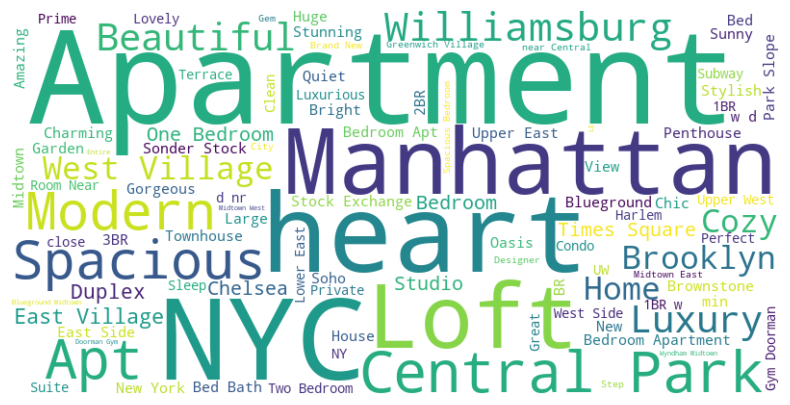

In [70]:
top_20_percent = data['price'].quantile(0.8)
df_expensive = data[data['price'] >= top_20_percent]

# Juntando todos os nomes dos locais mais caros
text = " ".join(df_expensive['nome'].dropna())

# Criando a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(text)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Remove os eixos
plt.savefig('../images/wordcloud.png')
plt.show()

### Retirar colunas nome, id, host_id, host_name e ultima_review

In [71]:
df = data.copy()
df = remove_columns(df, ['id','nome', 'host_name', 'ultima_review'])

### Analisando coluna com nulos nos reviews_por_mes

In [72]:
# Ou seja, os valores nulos de reviews_por_mes são devido a não haver reviews, logo, vamos preencher com 0
df[(df['reviews_por_mes'].isna()) & (df['numero_de_reviews'] > 0)]
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [73]:
df.dropna(how='any',inplace=True)
df.isna().sum()

host_id                          0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [74]:
df.duplicated().sum()

np.int64(49124)

In [75]:
df.drop_duplicates(inplace=True)

### Vamos visualizar a coluna categórica de bairro group

In [76]:
df['bairro_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

C:\Users\Akyla\AppData\Local\Temp\ipykernel_6940\965343672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['bairro_group'], palette='viridis')


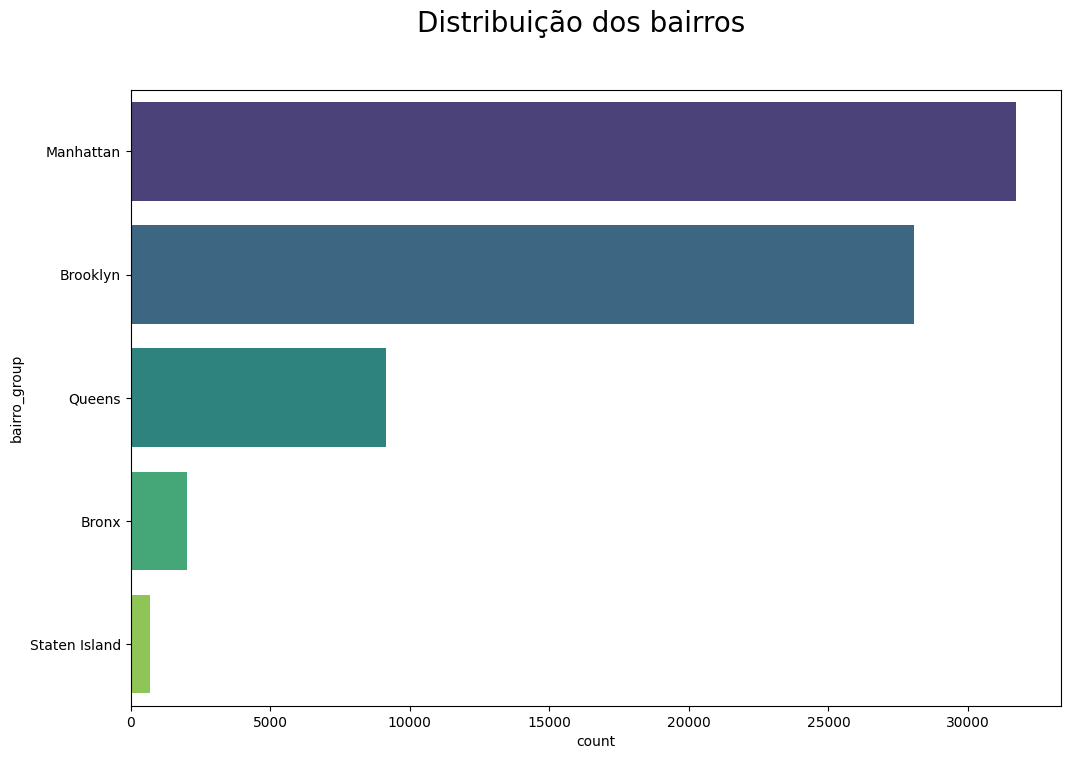

In [77]:
sns.countplot(data=df['bairro_group'], palette='viridis')
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.suptitle('Distribuição dos bairros', fontsize=20)
plt.savefig('../images/distribution_bairro_group.png')

### Tipos de quarto

C:\Users\Akyla\AppData\Local\Temp\ipykernel_6940\2103512981.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['room_type'], palette='viridis')


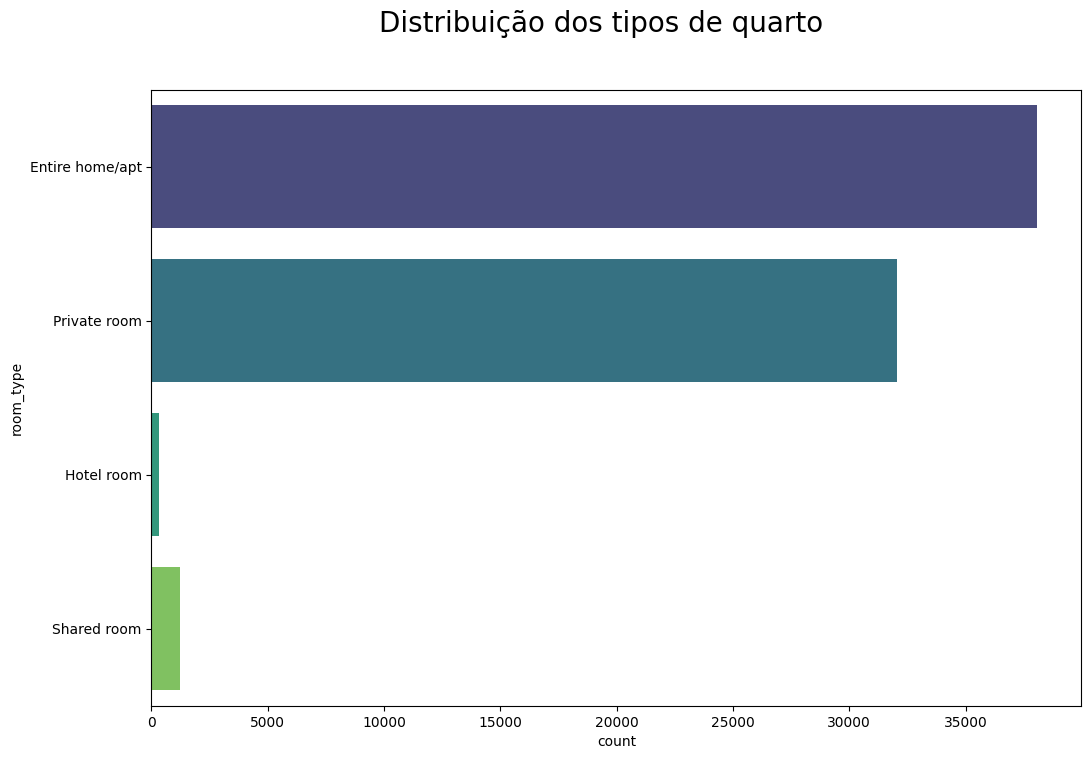

In [78]:
sns.countplot(data=df['room_type'], palette='viridis')
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.suptitle('Distribuição dos tipos de quarto', fontsize=20)
plt.savefig('../images/distribution_room_type.png')

### Agora vamos visualizar a organização dos dados quanto aos preços e número de reviews

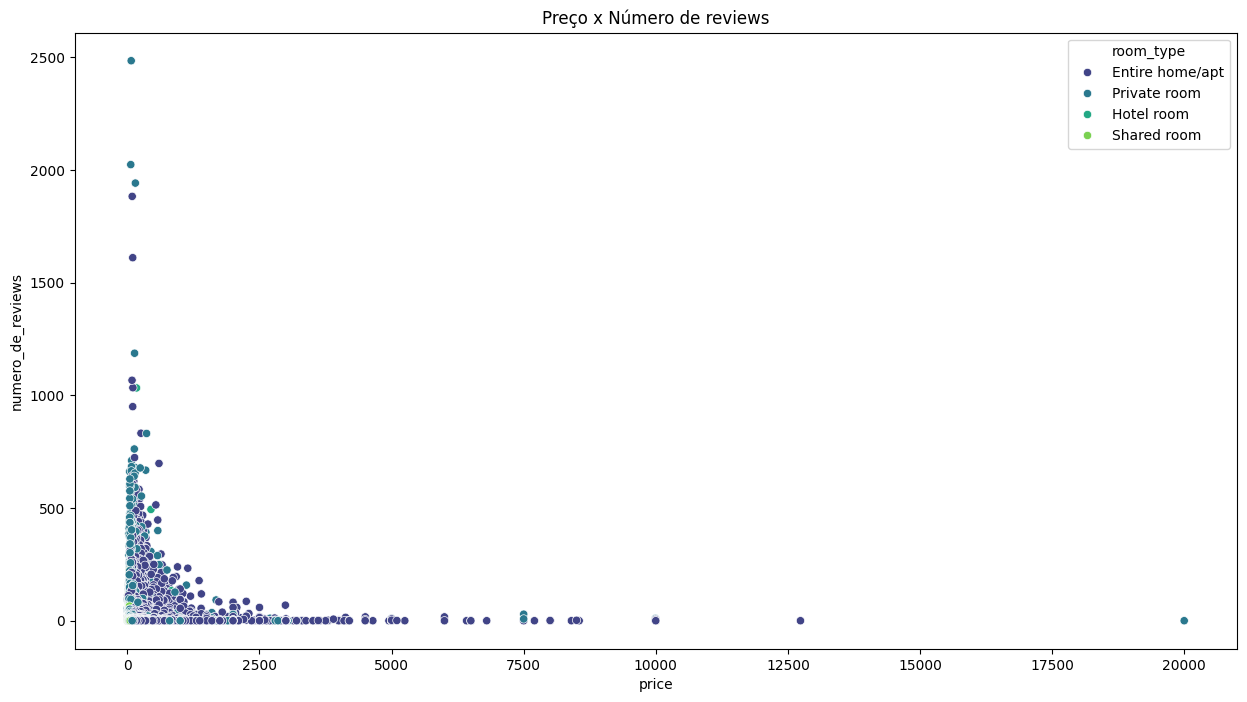

In [79]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='price', y='numero_de_reviews', hue='room_type', palette='viridis')
plt.title('Preço x Número de reviews')
plt.savefig('../images/preco_reviews_by_room_type.png')

### Agora vamos visualizar a organização dos dados quanto a latitude e longitude


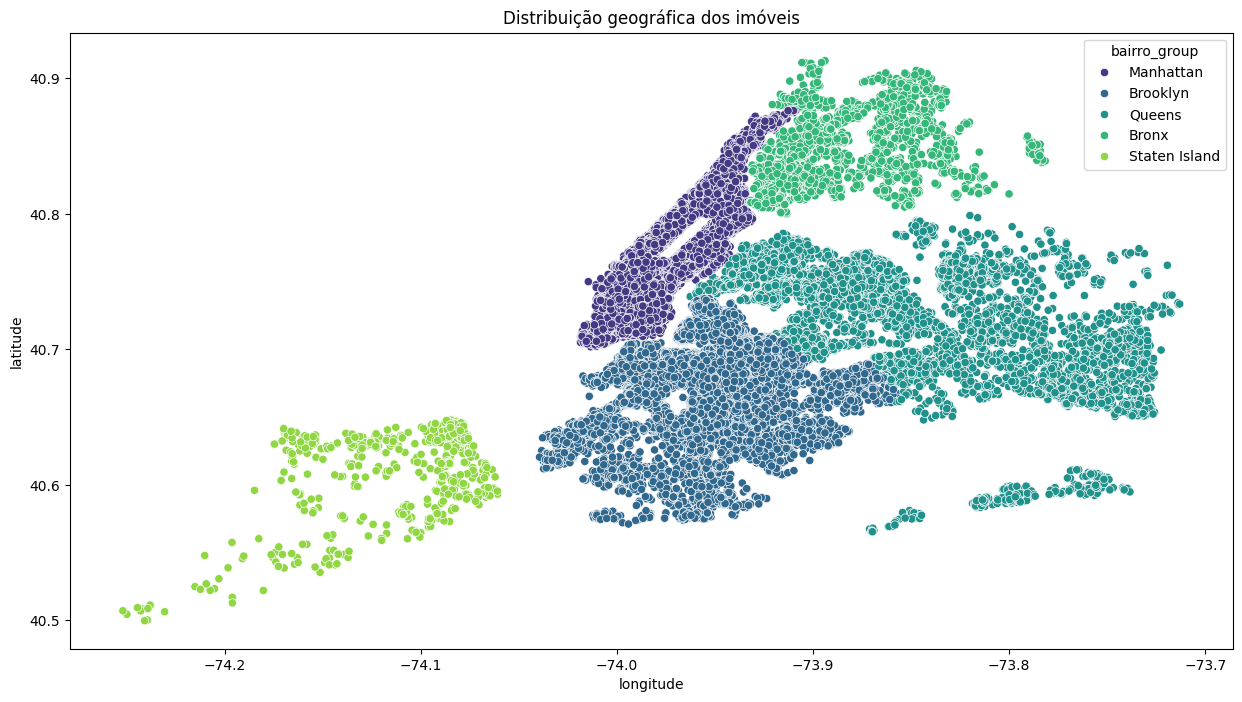

In [80]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['bairro_group'], palette='viridis')
plt.title('Distribuição geográfica dos imóveis')
plt.savefig('../images/geo_distribution_bairro_group.png')

In [81]:
df.to_csv('../src/data/silver/teste_indicium_precificacao.csv', index=False)

### Temos mais de 200 bairros, uma possibilidade é agrupar os bairros e colocar uma média de preço para cada bairro

In [82]:
df['bairro'].value_counts()


bairro
Bedford-Stuyvesant        5347
Williamsburg              4799
Harlem                    3704
Bushwick                  3292
Midtown                   2928
                          ... 
Fort Wadsworth               2
Chelsea, Staten Island       1
Country Club                 1
New Dorp                     1
Rossville                    1
Name: count, Length: 224, dtype: int64

In [83]:
nomes_bairros = df['bairro'].value_counts().index
nomes_bairros = pd.DataFrame(nomes_bairros)
nomes_bairros

,bairro
0,Bedford-Stuyvesant
1,Williamsburg
2,Harlem
3,Bushwick
4,Midtown
...,...
219,Fort Wadsworth
220,"Chelsea, Staten Island"
221,Country Club
222,New Dorp


In [84]:
df[df["bairro"] == 'Harlem']["price"].mean()

np.float64(130.15334773218143)

In [85]:
df = get_bairro_mean_price(df, nomes_bairros['bairro'].to_list()) 

Text(0.5, 1.0, 'Distribuição geográfica dos imóveis')

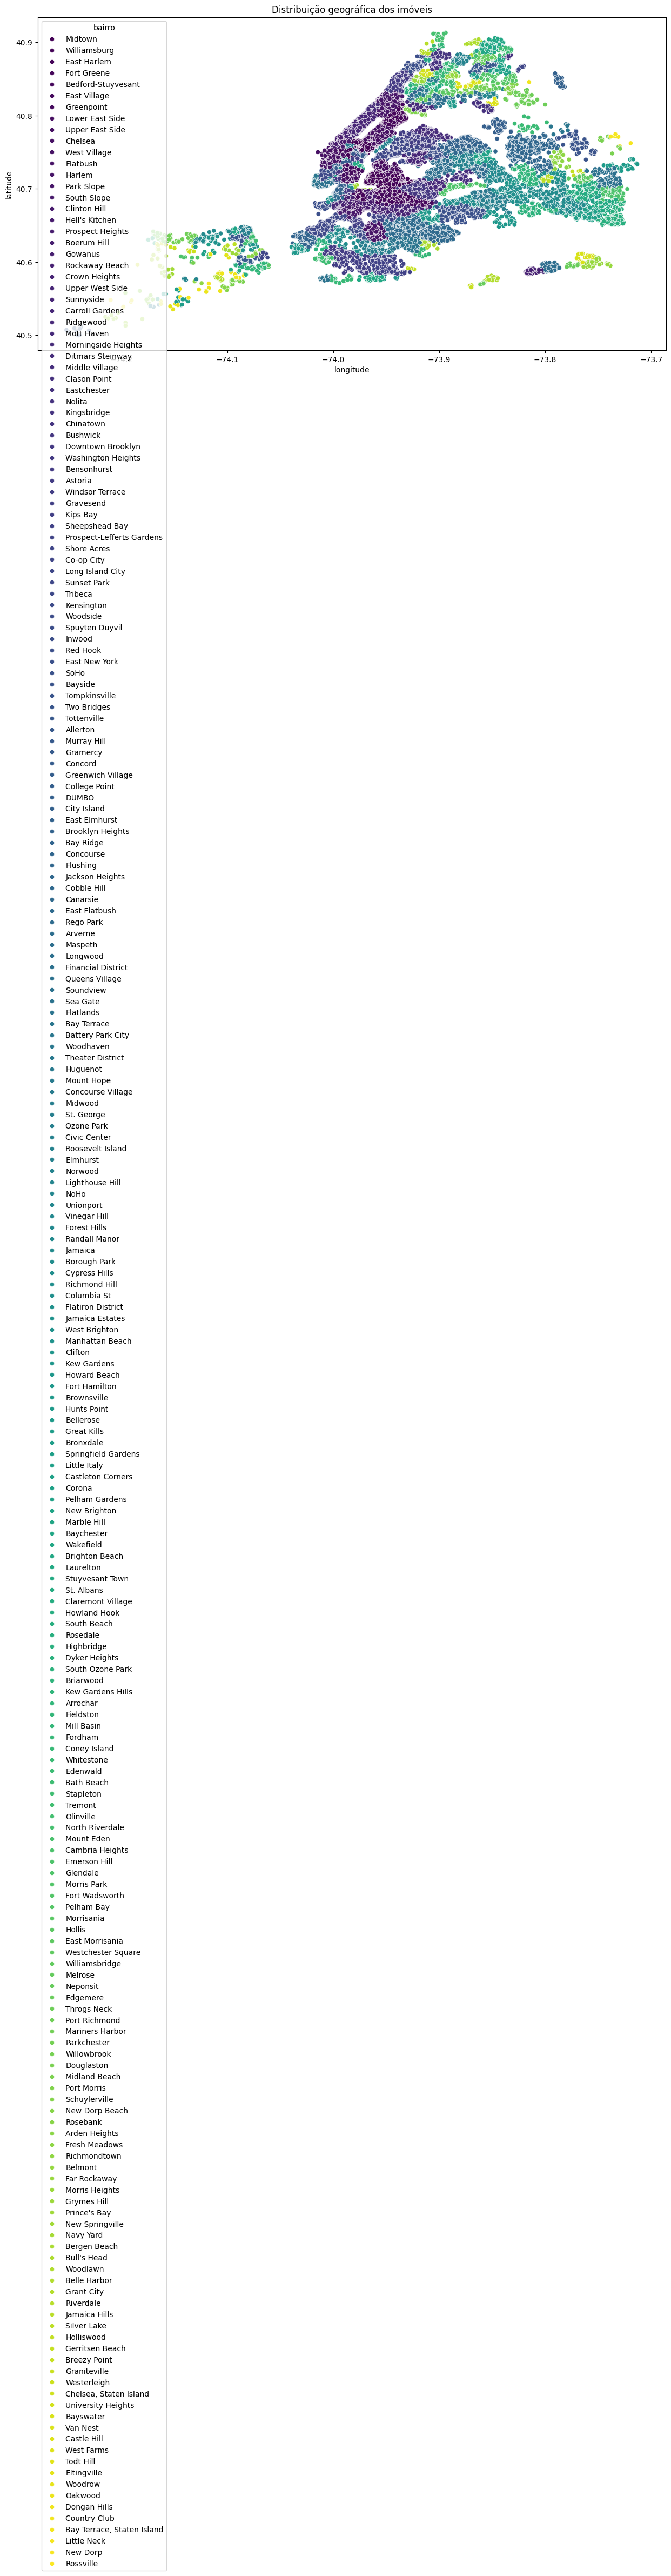

In [86]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['bairro'], palette='viridis')
plt.title('Distribuição geográfica dos imóveis')

In [87]:
df.groupby('bairro')['disponibilidade_365'].mean().sort_values(ascending=False).head(10)

bairro
Fort Wadsworth            365.000000
Eastchester               335.608696
Chelsea, Staten Island    335.000000
Co-op City                323.888889
Willowbrook               318.666667
Spuyten Duyvil            311.888889
Mill Basin                300.294118
Tottenville               295.181818
Midland Beach             292.000000
West Brighton             284.550000
Name: disponibilidade_365, dtype: float64

### Distribuição dos tipos de quarto

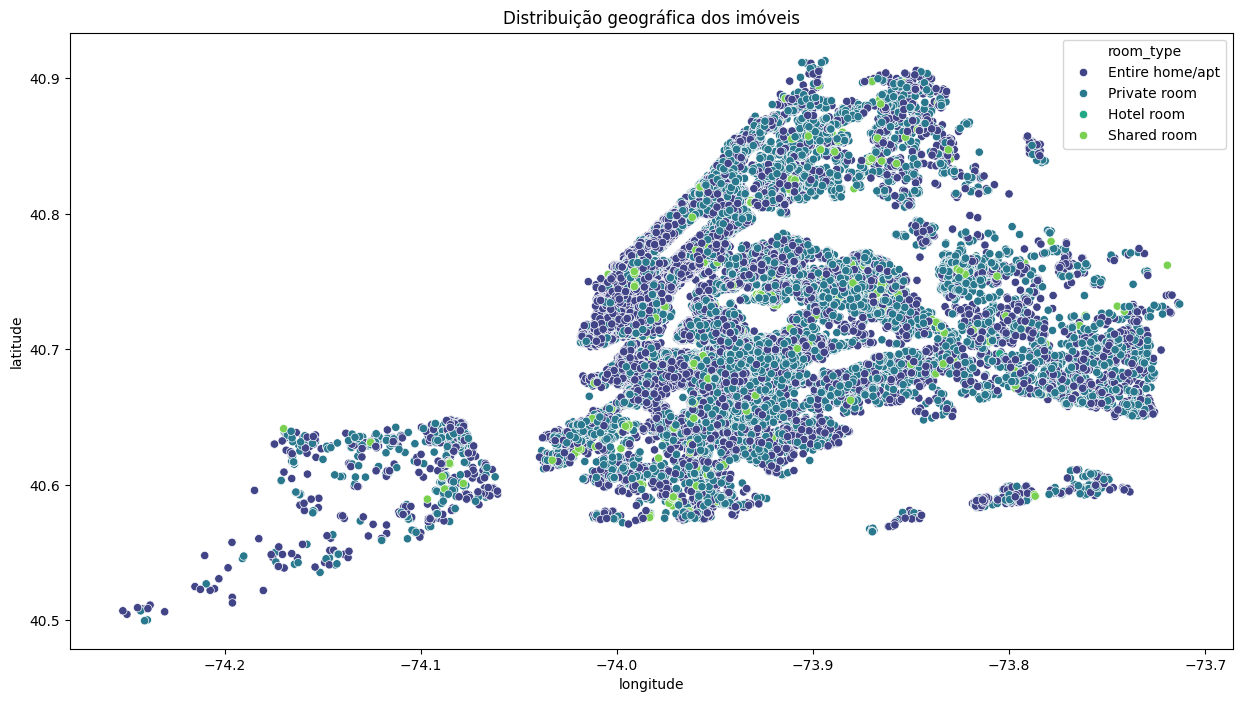

In [88]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['room_type'], palette='viridis')
plt.title('Distribuição geográfica dos imóveis')
plt.savefig('../images/geo_distribution_room_type.png')

In [89]:
# Vamos dropar a coluna bairro
df = remove_columns(df, ['bairro'])

In [90]:
df.to_csv('../src/data/silver/teste_indicium_precificacao.csv', index=False)

## Aqui iremos analisar a correlação de variáveis.

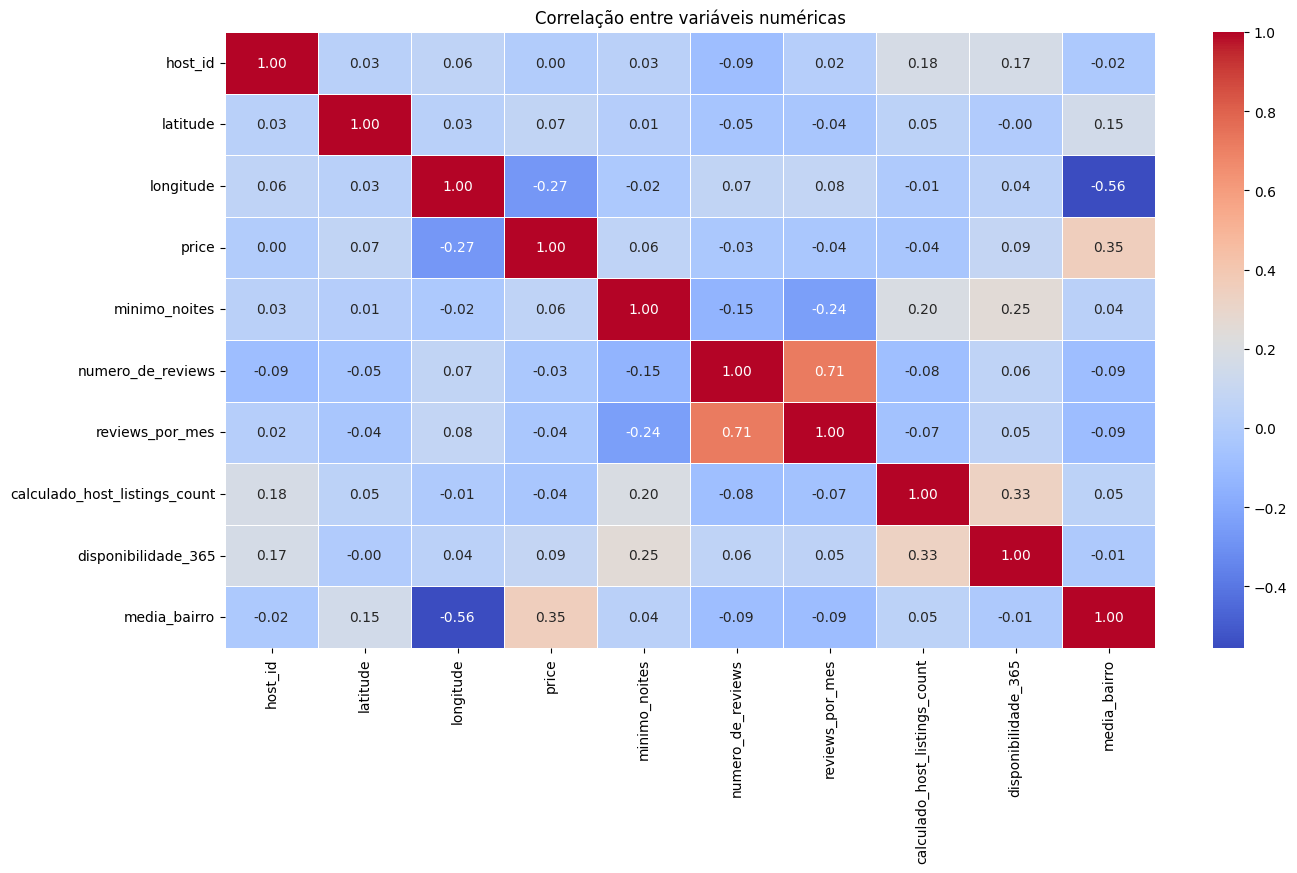

In [91]:
df = pd.read_csv('../src/data/silver/teste_indicium_precificacao.csv')

df_numeric = df.select_dtypes(include=['number'])

corr = df_numeric.corr(method='kendall')

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre variáveis numéricas")
plt.savefig('../images/correlation_pearson.png')
plt.show()

### Para a coluna bairro_group podemos aplicar one-hot-encoding para evitar dados categóricos

In [92]:
df_dummies = df_dummies = pd.get_dummies(df['bairro_group'], prefix='bairro_group')

In [93]:
df = pd.concat([df, df_dummies], axis=1)
df = remove_columns(df, ['bairro_group'])

### Agora vamos analisar a coluna room_type e tentar classificar em respostas padronizadas ou aplicar OHE.

In [94]:
# Temos 3 possíveis valores para a coluna room_type
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

#### Como temos apenas 3 possíveis valores, vamos utilizar one-hot-encoding

In [95]:
df_dummies = pd.get_dummies(df['room_type'], prefix='room_type')

In [96]:
df = pd.concat([df, df_dummies], axis=1)
df = remove_columns(df, ['room_type'])

## Assim deixamos um csv já pronto para modelagem e testar a eficiência

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71633 entries, 0 to 71632
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_id                        71633 non-null  int64  
 1   latitude                       71633 non-null  float64
 2   longitude                      71633 non-null  float64
 3   price                          71633 non-null  float64
 4   minimo_noites                  71633 non-null  int64  
 5   numero_de_reviews              71633 non-null  int64  
 6   reviews_por_mes                71633 non-null  float64
 7   calculado_host_listings_count  71633 non-null  int64  
 8   disponibilidade_365            71633 non-null  int64  
 9   media_bairro                   71633 non-null  float64
 10  bairro_group_Bronx             71633 non-null  bool   
 11  bairro_group_Brooklyn          71633 non-null  bool   
 12  bairro_group_Manhattan         71633 non-null 

In [98]:
columns_to_convert = [
    'bairro_group_Bronx', 'bairro_group_Brooklyn', 'bairro_group_Manhattan', 
    'bairro_group_Queens', 'bairro_group_Staten Island', 'room_type_Entire home/apt', 
    'room_type_Private room', 'room_type_Shared room',"room_type_Hotel room"
]
df = convert_boolean_columns_to_int(df, columns_to_convert)
df.to_csv('../src/data/gold/teste_indicium_precificacao_OHE.csv', index=False)